# KPI Notebook (Admin / Teacher / Student)

Charts are rendered from existing Analytics API endpoints.

In [1]:
import json
from urllib.request import urlopen
from datetime import datetime

BASE_URL = "http://127.0.0.1:8001"

def get_json(path):
    with urlopen(BASE_URL + path) as r:
        return json.loads(r.read().decode('utf-8'))

def safe_list(val):
    return val if isinstance(val, list) else []

def last_n(items, n):
    if not items:
        return []
    return items[-n:]

def fmt_date_label(s):
    if not s:
        return ''
    for fmt in ('%Y-%m-%d %H:%M:%S', '%Y-%m-%d'):
        try:
            dt = datetime.strptime(s, fmt)
            return dt.strftime('%m-%d')
        except ValueError:
            continue
    return s[:10]

def pick(obj, *keys):
    for k in keys:
        if k in obj and obj[k] is not None:
            return obj[k]
    return None


In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def _downsample_ticks(labels, max_labels=10):
    n = len(labels)
    if n <= max_labels:
        return list(range(n)), labels
    step = max(1, n // max_labels)
    idx = list(range(0, n, step))
    return idx, [labels[i] for i in idx]

def plot_line(xlabels, y, title, ylabel):
    xs = list(range(len(xlabels)))
    plt.figure(figsize=(8,3.2))
    plt.plot(xs, y, linewidth=2)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Date')
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.grid(True, axis='y', alpha=0.25)
    idx, lbls = _downsample_ticks(xlabels)
    ax.set_xticks(idx)
    ax.set_xticklabels(lbls, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_dual_line(xlabels, y1, y2, title, y1label, y2label):
    xs = list(range(len(xlabels)))
    plt.figure(figsize=(8,3.2))
    plt.plot(xs, y1, linewidth=2, label=y1label)
    plt.plot(xs, y2, linewidth=2, label=y2label)
    plt.title(title)
    plt.xlabel('Date')
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.grid(True, axis='y', alpha=0.25)
    idx, lbls = _downsample_ticks(xlabels)
    ax.set_xticks(idx)
    ax.set_xticklabels(lbls, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_bar(xlabels, y, title, ylabel):
    xs = list(range(len(xlabels)))
    plt.figure(figsize=(8,3.2))
    bars = plt.bar(xs, y)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Date')
    ax = plt.gca()
    ax.yaxis.set_major_locator(MaxNLocator(nbins=6))
    ax.grid(True, axis='y', alpha=0.25)
    idx, lbls = _downsample_ticks(xlabels)
    ax.set_xticks(idx)
    ax.set_xticklabels(lbls, rotation=45, ha='right')
    try:
        ax.bar_label(bars, fmt='%.1f')
    except Exception:
        pass
    plt.tight_layout()
    plt.show()

def plot_donut(progress_pct, title='Completion'):
    remaining = max(0, 100 - progress_pct)
    plt.figure(figsize=(3.5,3.5))
    plt.pie([progress_pct, remaining], labels=['Done','Remaining'], autopct='%1.0f%%',
            startangle=90, wedgeprops={'width':0.35})
    plt.title(title)
    plt.tight_layout()
    plt.show()


## 1) Student Overall

In [3]:
student_overall = get_json('/analytics/student-overall?moodle_user_id=20')
student_overall

{'courses': {'total': 2, 'completed': 1, 'completionRate': 50},
 'summary': {'totalCourses': 2,
  'completedCourses': 1,
  'completionRate': 50,
  'avgGradeAll': 84.7,
  'riskScoreOverall': 12.9},
 'activity': {'totalHours7d': 0.0,
  'activeDays7d': 0,
  'lastActive': '2026-02-10 11:02:00',
  'daysInactive': 1},
 'totals': {'missingTasks': 3, 'dueSoonTasks': 0},
 'engagement': {'posts': 3, 'comments': 3, 'reactions': 0},
 'trend': {'learningDaily': [{'date': '2026-02-05 00:00:00', 'count': 0},
   {'date': '2026-02-06 00:00:00', 'count': 0},
   {'date': '2026-02-07 00:00:00', 'count': 0},
   {'date': '2026-02-08 00:00:00', 'count': 0},
   {'date': '2026-02-09 00:00:00', 'count': 0},
   {'date': '2026-02-10 00:00:00', 'count': 0},
   {'date': '2026-02-11 00:00:00', 'count': 0}],
  'engagementDaily': [{'date': '2026-02-05 00:00:00', 'count': 0},
   {'date': '2026-02-06 00:00:00', 'count': 0},
   {'date': '2026-02-07 00:00:00', 'count': 0},
   {'date': '2026-02-08 00:00:00', 'count': 0},
 

In [4]:
summary = student_overall.get('summary', {})
activity = student_overall.get('activity', {})
courses = student_overall.get('courses', {})

total_courses = pick(summary, 'totalCourses') or courses.get('total')
completed_courses = pick(summary, 'completedCourses') or courses.get('completed')
completion_rate = pick(summary, 'completionRate') or courses.get('completionRate')
avg_grade_all = pick(summary, 'avgGradeAll')
risk_score_overall = pick(summary, 'riskScoreOverall')
total_hours_7d = pick(activity, 'totalHours7d')
active_days_7d = pick(activity, 'activeDays7d')
last_active = pick(activity, 'lastActive') or student_overall.get('lastActive')
days_inactive = pick(activity, 'daysInactive') or student_overall.get('daysInactive')
engagement = student_overall.get('engagement', {})

print('Total Courses:', total_courses)
print('Completed Courses:', completed_courses)
print('Completion Rate:', completion_rate, '%')
print('Avg Grade All:', avg_grade_all, '%')
print('Risk Score Overall:', risk_score_overall, '%')
print('Total Hours 7d:', total_hours_7d)
print('Active Days 7d:', active_days_7d)
print('Last Active:', last_active)
print('Days Inactive:', days_inactive)
print('Engagement Posts:', engagement.get('posts'))
print('Engagement Comments:', engagement.get('comments'))
print('Engagement Reactions:', engagement.get('reactions'))


Total Courses: 2
Completed Courses: 1
Completion Rate: 50 %
Avg Grade All: 84.7 %
Risk Score Overall: 12.9 %
Total Hours 7d: 0.0
Active Days 7d: 0
Last Active: 2026-02-10 11:02:00
Days Inactive: 1
Engagement Posts: 3
Engagement Comments: 3
Engagement Reactions: 0


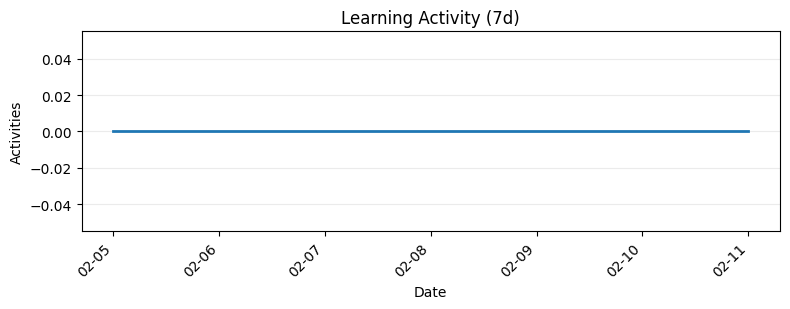

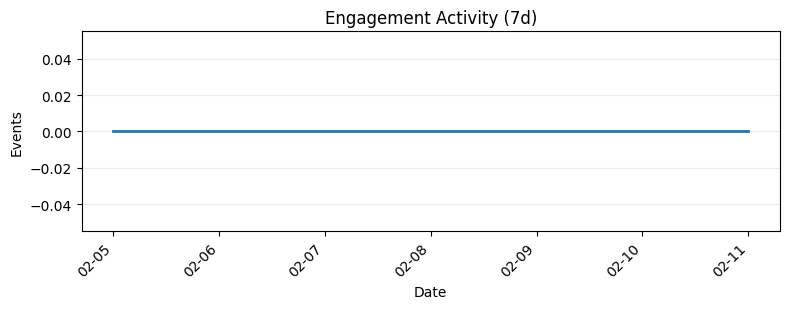

In [5]:
learning = safe_list(student_overall.get('trend', {}).get('learningDaily'))
if learning:
    x = [fmt_date_label(t['date']) for t in learning]
    y = [t['count'] for t in learning]
    plot_line(x, y, 'Learning Activity (7d)', 'Activities')

eng_daily = safe_list(student_overall.get('trend', {}).get('engagementDaily'))
if eng_daily:
    x = [fmt_date_label(t['date']) for t in eng_daily]
    y = [t['count'] for t in eng_daily]
    plot_line(x, y, 'Engagement Activity (7d)', 'Events')


## 2) Student Per Course

In [6]:
student = get_json('/analytics/student-per-course?moodle_user_id=20&course_id=101')
student

{'courseInfo': {'courseId': 101,
  'courseName': 'Product Thinking Basics',
  'teacherName': 'Teacher One',
  'tags': ['product', 'innovation'],
  'totalActivities': 6,
  'completedActivities': 5},
 'progress': {'progressPercent': 83, 'completionRate': 83, 'completed': False},
 'risk': {'gradeRisk': 20.7,
  'missingRisk': 10,
  'inactivityRisk': 3.3,
  'overallRisk': 11.3},
 'avgGradePct': 79.3,
 'missingTasks': 1,
 'lastActive': '2026-02-10 00:00:00',
 'daysInactive': 1,
 'timeSpentHours': 1.83,
 'learningHoursPerWeek': 1.83,
 'hoursPerDay': [{'date': '2026-02-05 00:00:00', 'hours': 0.25},
  {'date': '2026-02-06 00:00:00', 'hours': 0.33},
  {'date': '2026-02-07 00:00:00', 'hours': 0.25},
  {'date': '2026-02-08 00:00:00', 'hours': 0.5},
  {'date': '2026-02-09 00:00:00', 'hours': 0.25},
  {'date': '2026-02-10 00:00:00', 'hours': 0.25},
  {'date': '2026-02-11 00:00:00', 'hours': 0.0}],
 'progressDonut': {'progress': 83, 'done': 17},
 'activities': [{'activityId': 507,
   'activityName': 

In [7]:
print('Course:', student.get('courseInfo', {}).get('courseName'))
print('Teacher:', student.get('courseInfo', {}).get('teacherName'))
print('Progress:', student.get('progress', {}).get('progressPercent'), '%')
print('Avg Grade:', student.get('avgGradePct'), '%')
print('Missing Tasks:', student.get('missingTasks'))
print('Risk:', student.get('risk', {}).get('overallRisk'))


Course: Product Thinking Basics
Teacher: Teacher One
Progress: 83 %
Avg Grade: 79.3 %
Missing Tasks: 1
Risk: 11.3


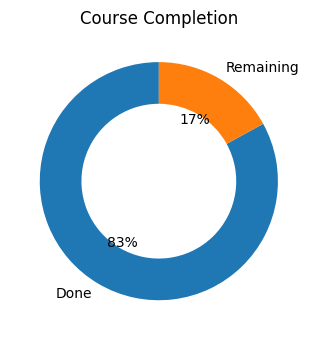

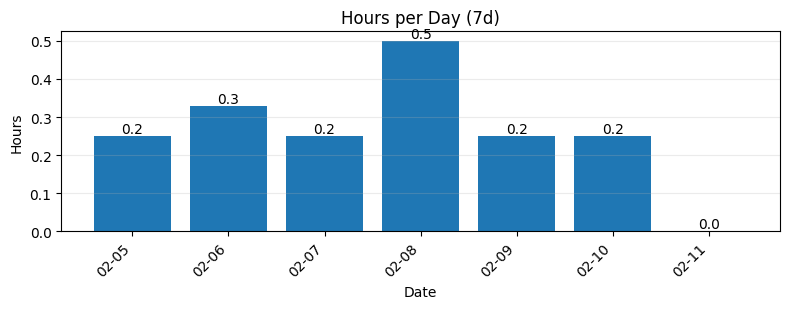

In [8]:
# Completion donut
progress = student.get('progress', {}).get('progressPercent', 0)
plot_donut(progress, title='Course Completion')

# Hours per day (7d)
hours = safe_list(student.get('hoursPerDay'))
x = [fmt_date_label(h.get('date')) for h in hours]
y = [h.get('hours', 0) for h in hours]
plot_bar(x, y, 'Hours per Day (7d)', 'Hours')


## 3) Teacher Overall

In [9]:
teacher = get_json('/analytics/teacher-overall?teacher_id=10')
teacher

{'teacher_id': 10,
 'total_students': 5,
 'total_courses': 3,
 'inactive_students_7d': 0,
 'inactive_students_30d': 0,
 'at_risk_pct': 0.0,
 'at_risk_count': 0,
 'completion_rate': 41.6,
 'avg_learning_hours_per_week': 0.3,
 'dropout_rate': 0.0,
 'ungraded_submissions': 0,
 'total_forums': 2,
 'forums': [{'forumId': 'forum-001',
   'forumName': 'Teacher Forum 1',
   'role': 'admin',
   'totalPosts': 5,
   'totalComments': 5,
   'totalMembers': 3,
   'lastActivity': '2026-02-09 15:49:27'},
  {'forumId': 'forum-002',
   'forumName': 'Teacher Forum 2',
   'role': 'admin',
   'totalPosts': 3,
   'totalComments': 2,
   'totalMembers': 2,
   'lastActivity': '2026-02-10 15:49:27'}],
 'forumActivity': {'timeline': [{'date': '2026-02-05 00:00:00',
    'posts': 0,
    'comments': 1},
   {'date': '2026-02-06 00:00:00', 'posts': 0, 'comments': 0},
   {'date': '2026-02-07 00:00:00', 'posts': 0, 'comments': 0},
   {'date': '2026-02-08 00:00:00', 'posts': 4, 'comments': 2},
   {'date': '2026-02-09 00

In [10]:
print('Total Students:', teacher.get('total_students'))
print('Total Courses:', teacher.get('total_courses'))
print('Completion Rate:', teacher.get('completion_rate'), '%')
print('Avg Hours/Week:', teacher.get('avg_learning_hours_per_week'))
print('Dropout Rate:', teacher.get('dropout_rate'), '%')
print('At Risk:', teacher.get('at_risk_pct'), '%')
print('Ungraded:', teacher.get('ungraded_submissions'))


Total Students: 5
Total Courses: 3
Completion Rate: 41.6 %
Avg Hours/Week: 0.3
Dropout Rate: 0.0 %
At Risk: 0.0 %
Ungraded: 0


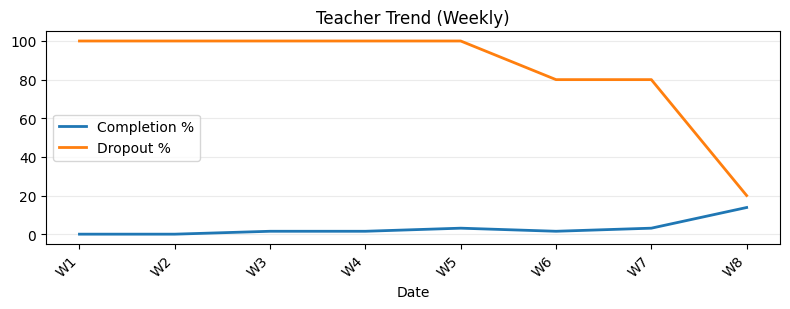

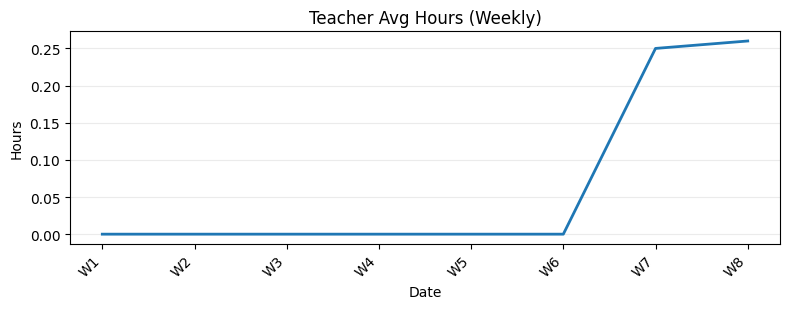

In [11]:
trend = teacher.get('trends', {}).get('weekly', [])
labels = [t['label'] for t in trend]
completion = [t['completion'] for t in trend]
dropout = [t['dropout'] for t in trend]
hours = [t['avgHours'] for t in trend]

plot_dual_line(labels, completion, dropout, 'Teacher Trend (Weekly)', 'Completion %', 'Dropout %')
plot_line(labels, hours, 'Teacher Avg Hours (Weekly)', 'Hours')


## 4) Admin Overall (7d only)

In [12]:
admin_overall = get_json('/analytics/admin-overall')
admin_learning = get_json('/analytics/admin-learning')
admin_engagement = get_json('/analytics/admin-engagement')
admin_ideas = get_json('/analytics/admin-ideas')
admin_overall, admin_learning, admin_engagement, admin_ideas

({'users': {'total': 8,
   'byRole': {'admin': 1,
    'student': 4,
    'teacher': 1,
    'mentor': 1,
    'investor': 1},
   'newWeek': 8,
   'newMonth': 8,
   'active7d': 5,
   'inactive7d': 3,
   'active30d': 5,
   'inactive30d': 3,
   'trend7d': [{'date': '2026-02-05 00:00:00', 'activeUsers': 1},
    {'date': '2026-02-06 00:00:00', 'activeUsers': 2},
    {'date': '2026-02-07 00:00:00', 'activeUsers': 2},
    {'date': '2026-02-08 00:00:00', 'activeUsers': 3},
    {'date': '2026-02-09 00:00:00', 'activeUsers': 3},
    {'date': '2026-02-10 00:00:00', 'activeUsers': 1},
    {'date': '2026-02-11 00:00:00', 'activeUsers': 0}]},
  'alerts': {'studentsAtRisk': 0,
   'assignmentOverdue': 9,
   'ideaPendingReview': 5,
   'mentorMatchOverdue': 1}},
 {'coursesTotal': 3,
  'completionRate': 28.6,
  'avgProgressPct': 41.6,
  'topCoursesByEnroll': [{'courseId': 101,
    'courseName': 'Product Thinking Basics',
    'enrolCount': 3},
   {'courseId': 102, 'courseName': 'Pitch Deck Sprint', 'enrolCou

In [13]:
print('Users:', admin_overall['users']['total'])
print('Courses:', admin_learning['coursesTotal'])
print('Completion Rate:', admin_learning['completionRate'], '%')
print('Avg Progress:', admin_learning['avgProgressPct'], '%')
print('Posts:', admin_engagement['totals']['posts'])
print('Comments:', admin_engagement['totals']['comments'])
print('Reactions:', admin_engagement['totals']['reactions'])
print('Ideas:', admin_ideas['ideasTotal'])
print('Pitch:', admin_ideas['pitch']['total'])
print('Funding:', admin_ideas['pitch']['fundingTotal'])
print('Alerts:', admin_overall['alerts'])


Users: 8
Courses: 3
Completion Rate: 28.6 %
Avg Progress: 41.6 %
Posts: 9
Comments: 8
Reactions: 1
Ideas: 6
Pitch: 4
Funding: 12000.0
Alerts: {'studentsAtRisk': 0, 'assignmentOverdue': 9, 'ideaPendingReview': 5, 'mentorMatchOverdue': 1}


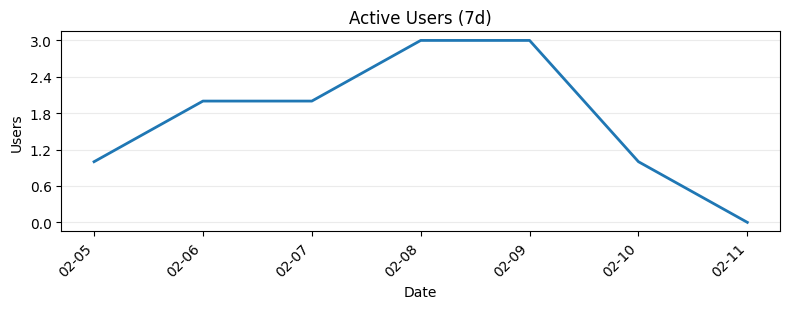

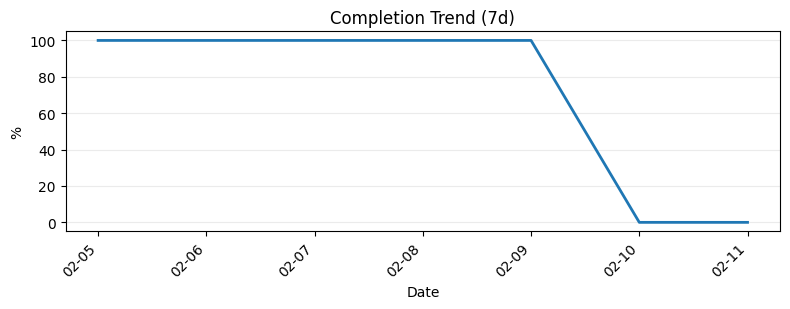

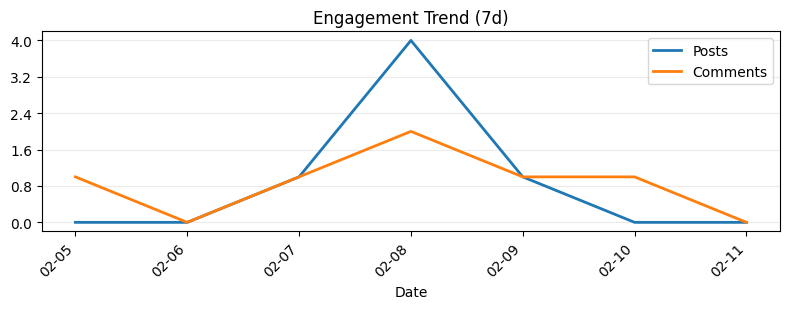

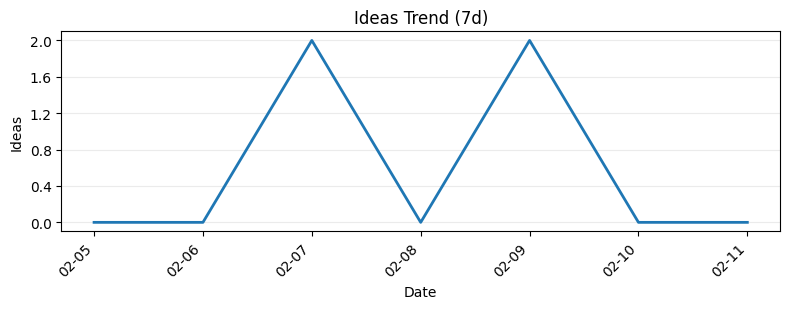

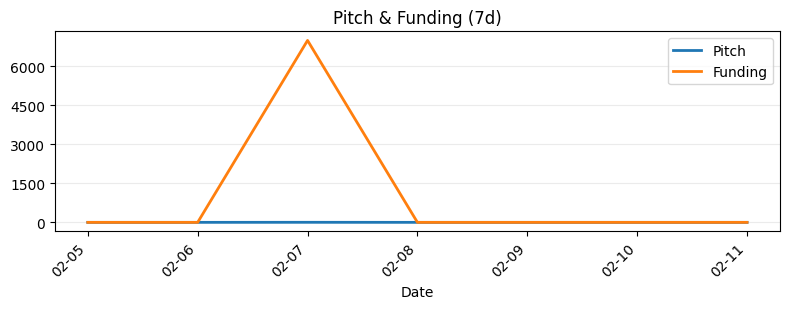

In [14]:
users_trend = last_n(safe_list(admin_overall['users'].get('trend7d')), 7)
if users_trend:
    x = [fmt_date_label(t['date']) for t in users_trend]
    y = [t['activeUsers'] for t in users_trend]
    plot_line(x, y, 'Active Users (7d)', 'Users')

completion_trend = last_n(safe_list(admin_learning.get('completionTrend30d')), 7)
if completion_trend:
    x = [fmt_date_label(t['date']) for t in completion_trend]
    y = [t['completionPct'] for t in completion_trend]
    plot_line(x, y, 'Completion Trend (7d)', '%')

engage_trend = last_n(safe_list(admin_engagement.get('timeline30d')), 7)
if engage_trend:
    x = [fmt_date_label(t['date']) for t in engage_trend]
    posts = [t['posts'] for t in engage_trend]
    comments = [t['comments'] for t in engage_trend]
    plot_dual_line(x, posts, comments, 'Engagement Trend (7d)', 'Posts', 'Comments')

ideas_trend = last_n(safe_list(admin_ideas.get('ideasTrend30d')), 7)
if ideas_trend:
    x = [fmt_date_label(t['date']) for t in ideas_trend]
    y = [t['ideas'] for t in ideas_trend]
    plot_line(x, y, 'Ideas Trend (7d)', 'Ideas')

pitch_trend = last_n(safe_list(admin_ideas.get('pitchTrend30d')), 7)
if pitch_trend:
    x = [fmt_date_label(t['date']) for t in pitch_trend]
    pitch = [t['pitchCount'] for t in pitch_trend]
    funding = [t['fundingTotal'] for t in pitch_trend]
    plot_dual_line(x, pitch, funding, 'Pitch & Funding (7d)', 'Pitch', 'Funding')
